In [20]:
import orbit_calculations as oc
reload(orbit_calculations)

a = oc.get_SI('aEarthSun')
e = oc.get_SI('eEarth')
mEarth = oc.get_SI('mEarth')
MSun = oc.get_SI('mSun')

y_out = oc.generate_orbit_pos_vel(a, e, m1=MSun, m2=mEarth, circum_steps=100, debug=True)

100 steps took 0.0318338871002 seconds


original took 0.754693984985 sec for 1000000.0 steps


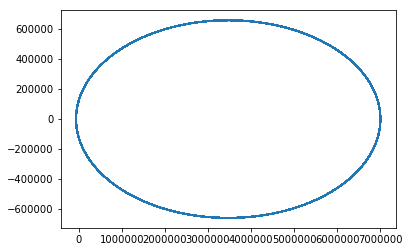

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from time import time

def dr_dt(y, t):
    """Integration of the governing vector differential equation.
    d2r_dt2 = -(mu/R^3)*r with d2r_dt2 and r as vecotrs.
    Initial position and velocity are given.
    y[0:2] = position components
    y[3:] = velocity components"""

    G = 6.672*(10**-11)
    M = 5.972*(10**24)
    Gm = G*M
    r = np.sqrt(y[0]**2 + y[1]**2 + y[2]**2)

    dy0 = y[3]
    dy1 = y[4]
    dy2 = y[5]
    dy3 = -(Gm / (r**3)) * y[0]
    dy4 = -(Gm / (r**3)) * y[1]
    dy5 = -(Gm / (r**3)) * y[2]
    return [dy0, dy1, dy2, dy3, dy4, dy5]

t_final = 10**5 # seconds
dt = 0.1 # seconds

t = np.arange(0, t_final, dt)
y0 = [7.e6, 0., 0., 0., 1.e3, 0.]

start = time()
y = odeint(dr_dt, y0, t)
print('original took {} sec for {} steps'.format(time() - start, t_final / dt))
plt.plot(y[:,0], y[:,1])
plt.show()